In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from empiricaldist import Pmf

def manual_calculate_percentile(data, percentile):
    """
    Calculate the given percentile of a list of numbers manually.

    Parameters:
    data (list): The list of numbers.
    percentile (float): The percentile to calculate (between 0 and 100).

    Returns:
    float: The value at the given percentile.
    """
    # Sort the data
    sorted_data = sorted(data)

    # Calculate the index
    index = (percentile / 100) * (len(sorted_data) - 1)
    #index = percentile / 100 * (len(sorted_data) + 1) # This is the formula used most often when I looked into it.

    # If the index is an integer, return the value at this index
    if index.is_integer():
        return sorted_data[int(index)]
    else:
        # If the index is not an integer, interpolate between the two surrounding values
        lower_index = int(index)
        upper_index = lower_index + 1
        interpolation_weight = index - lower_index
        return sorted_data[lower_index] + interpolation_weight * (sorted_data[upper_index] - sorted_data[lower_index])

def manual_calculate_percentile_given_score(data, score):
    """
    Calculate the percentile of a given score manually.

    Parameters:
    data (list): The list of numbers.
    score (float): The score to calculate the percentile of.

    Returns:
    float: The percentile of the given score.
    """
    # Sort the data
    sorted_data = sorted(data)

    # Calculate the index
    index = sorted_data.index(score)

    # Calculate the percentile
    # Percentile = (number of values below score) ÷ (total number of scores) x 100

    # or
    percentile = (index / len(sorted_data)) * 100

    return percentile


test_scores2 = [67, 70, 75, 76, 77, 78, 80, 83, 85, 87, 88, 89, 90, 93, 95]

percentile = manual_calculate_percentile_given_score(test_scores2, 88)
print(f'88 is in the following percentile: {percentile}.')

value = manual_calculate_percentile(test_scores2, percentile)
print(f'The value at the {percentile} percentile is {value}.')

# Sample data: 60 test scores with some repeated values
test_scores = np.random.choice(range(50, 101), size=60, replace=True)

# Calculating basic statistics
mean_score = np.mean(test_scores)
median_score = np.median(test_scores)
mode_score = Counter(test_scores).most_common(1)[0][0]  # Most common value

# Calculating quartiles
first_quartile = np.percentile(test_scores, 25)
third_quartile = np.percentile(test_scores, 75)

# Calculating a specific percentile, e.g., the 90th percentile
ninety_percentile = np.percentile(test_scores, 90)

# Creating a Probability Mass Function (PMF)
value_counts = Counter(test_scores)
value_counts
total_count = len(test_scores)

# Output the results
basic_statistics_man = {
    "Mean": mean_score,
    "Median": median_score,
    "Mode": mode_score,
    "1st Quartile": first_quartile,
    "3rd Quartile": third_quartile,
    "90th Percentile": ninety_percentile
}

basic_statistics_man

88 is in the following percentile: 66.66666666666666.
The value at the 66.66666666666666 percentile is 87.33333333333333.


{'Mean': 73.25,
 'Median': 73.0,
 'Mode': 90,
 '1st Quartile': 59.75,
 '3rd Quartile': 87.0,
 '90th Percentile': 94.1}

In [2]:
def quantile_manual(pmf, percentile):
    """
    Given a pmf, computes the value that corresponds to the given percentile.
    """
    total = 0
    for q, p in pmf.items():
        total += p
        if total >= percentile:
            return q
    return np.nan

# Sample data: 60 test scores with some repeated values
test_scores = np.random.choice(range(50, 101), size=60, replace=True)


pmf_emperical = Pmf.from_seq(test_scores) 
pmf_manual = {k: v / total_count for k, v in value_counts.items()}

# Compute the percentile rank of a given test score using PMF library
print(test_scores)
print(pmf_emperical.quantile(0.6))
print(f'The test score at the 60th percentile: {quantile_manual(pmf_emperical, 0.6)}')  # return the test score at the given percentile rank
print(f'A score of 82% puts you in the {pmf_emperical.prob_le(82) * 100}th percentile') # return the percentile rank of a given test score

[ 76  93  85  89  83  53  71  80  66  58  85  78  84 100  89  78  72  55
  78  65  55  52  63  77  69  61  76  74  92  73  74  93  84  65  51  65
  82  99  59  63  95  57  97  59  70  64  69  97  53  73  84  76  53  50
  54  85  50  69  97  64]
76.0
The test score at the 60th percentile: 76
A score of 82% puts you in the 70.0th percentile


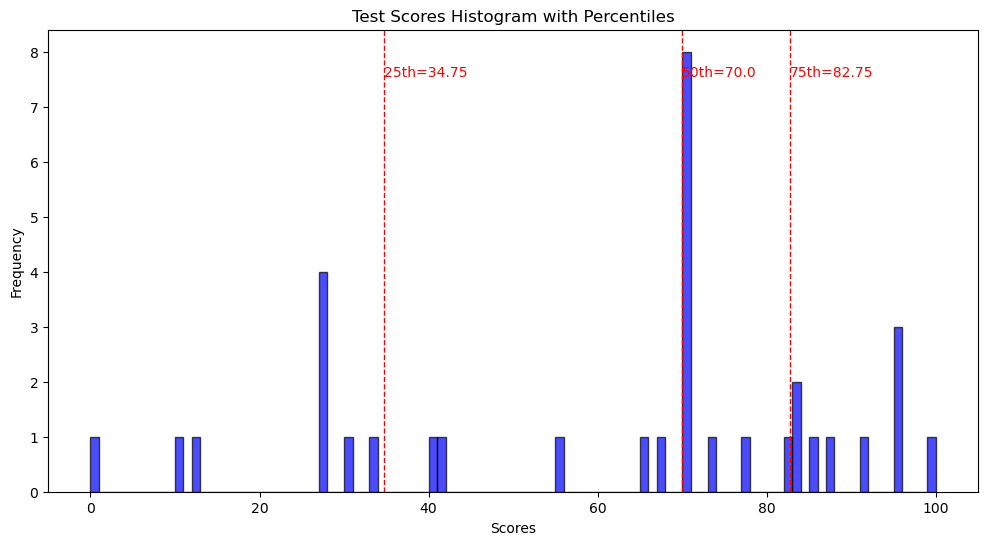

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_scores_and_percentiles(scores, bins):
    # Calculate percentiles
    percentiles = np.percentile(scores, [25, 50, 75])

    plt.figure(figsize=(12, 6))

    # Create histogram with specified bins
    plt.hist(scores, bins=bins, alpha=0.7, color='blue', edgecolor='black')

    # Add percentile lines
    for percentile in percentiles:
        plt.axvline(percentile, color='red', linestyle='dashed', linewidth=1)

    # Add percentile labels
    plt.text(percentiles[0], plt.ylim()[1]*0.9, f'25th={percentiles[0]}', color='red')
    plt.text(percentiles[1], plt.ylim()[1]*0.9, f'50th={percentiles[1]}', color='red')
    plt.text(percentiles[2], plt.ylim()[1]*0.9, f'75th={percentiles[2]}', color='red')

    # Add title and labels
    plt.title('Test Scores Histogram with Percentiles')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')

    # Show plot
    plt.show()

# Example usage
test_scores = [83, 95, 91, 87, 70,70,70,70,70,70,70,70, 0, 85, 82, 100, 67, 73, 77, 65,83, 95,95, 30, 33, 40, 55, 10, 12, 41, 27, 27,27,27]

# Method 1: Using a fixed number of bins
plot_scores_and_percentiles(test_scores, bins=100)

# Method 2: Using specified bin edges
# plot_scores_and_percentiles(test_scores, bins=np.arange(0, 101, 10))  # Bins from 0 to 100 with a width of 10



In [4]:
import numpy as np

# Generate a random list of integers with some repeated numbers
np.random.seed(0)
data = np.random.randint(0, 20, 30)

# Sort the data for easier understanding
sorted_data = np.sort(data)

# Calculate percentiles for each number in the sorted data
percentiles = [np.percentile(sorted_data, p) for p in range(0, 101, 10)]

# Create a dictionary to map each number to its percentile range
percentile_mapping = {}
for num in sorted_data:
    for p in range(10, 101, 10):
        if num <= percentiles[p // 10]:
            percentile_mapping[num] = f"{p-10}-{p}%"
            break

sorted_data, percentile_mapping



(array([ 0,  0,  1,  3,  3,  3,  4,  5,  5,  6,  6,  7,  7,  8,  9,  9, 12,
        12, 13, 14, 15, 15, 15, 16, 17, 18, 18, 19, 19, 19]),
 {0: '0-10%',
  1: '0-10%',
  3: '10-20%',
  4: '20-30%',
  5: '20-30%',
  6: '30-40%',
  7: '30-40%',
  8: '40-50%',
  9: '40-50%',
  12: '50-60%',
  13: '60-70%',
  14: '60-70%',
  15: '60-70%',
  16: '70-80%',
  17: '80-90%',
  18: '80-90%',
  19: '90-100%'})

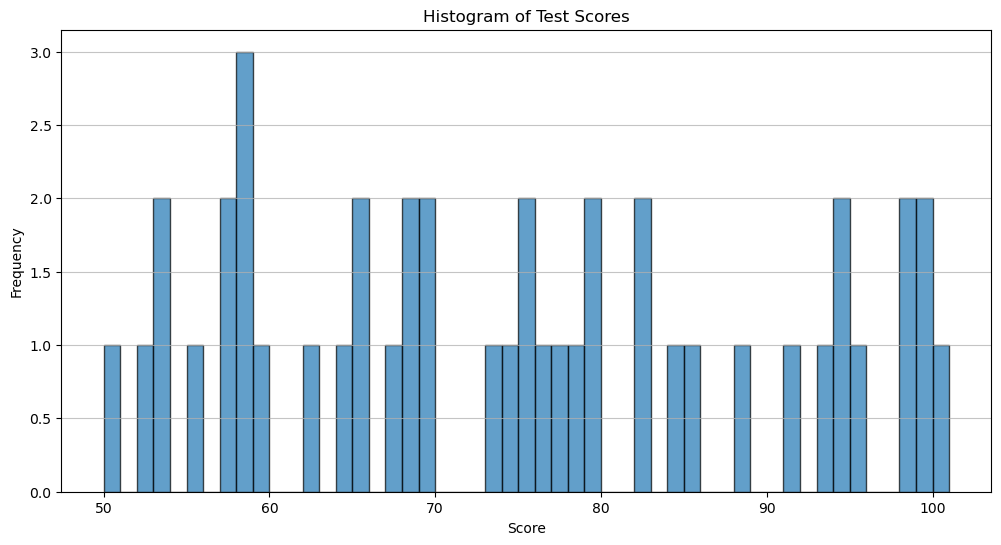

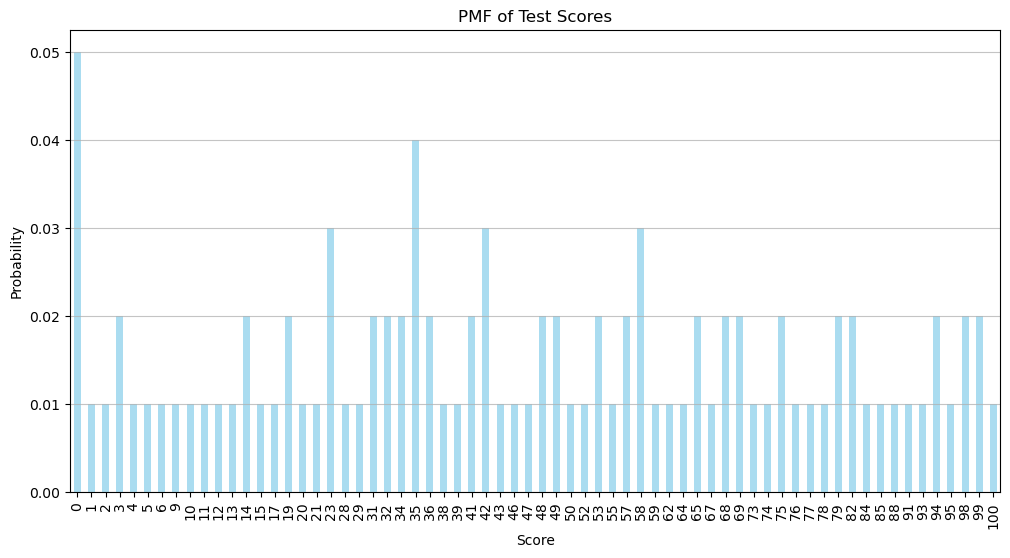

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf

# Sample data: a list of numbers (e.g., test scores)
data = np.random.choice(range(0, 101), size=100, replace=True)

# Creating a histogram
plt.figure(figsize=(12, 6))
plt.hist(data, bins=range(50, 102), edgecolor='black', alpha=0.7)
plt.title('Histogram of Test Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Creating a PMF
pmf = Pmf.from_seq(data)

# Plotting the PMF
plt.figure(figsize=(12, 6))
pmf.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('PMF of Test Scores')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [10]:
import numpy as np

# Generate a random list of integers with some repeated numbers
np.random.seed(0)
data = np.random.randint(0, 20, 30)
data = [83, 95, 91, 87, 70,70,70,70,70,70,70,70, 70, 70,70,70,70,70,70,70,70,70,70,70, 85, 82, 100, 67, 73, 77, 65,83, 95,95, 30, 33, 40, 55, 10, 12, 41, 27, 27,27,27]

# Sort the data for easier understanding
sorted_data = np.sort(data)
print(sorted_data)

rand_list = np.arange(0, 101, 10)

print(rand_list)

# Calculate percentiles for each number in the sorted data
percentiles = [np.percentile(sorted_data, p) for p in range(0, 101, 1)]

print(list(zip(percentiles, range(0, 101, 1))))

# Create a dictionary to map each number to its percentile range
percentile_mapping = {}
for num in sorted_data:
    for p in range(10, 101, 10):
        if num <= percentiles[p // 10]:
            percentile_mapping[num] = f"{p-10}-{p}%"
            break

sorted_data, percentile_mapping

# Assigning a unique percentile rank to each individual number in the dataset

# Calculating the percentile rank for each number in the sorted data
# We will use the formula: rank = (number of values below x + 0.5) / total number of values * 100
percentile_ranks = [((np.sum(sorted_data < num) + 0.5) / len(sorted_data)) * 100 for num in sorted_data]

# Combining the numbers with their percentile ranks
percentile_rank_mapping = list(zip(sorted_data, percentile_ranks))

percentile_rank_mapping





[ 10  12  27  27  27  27  30  33  40  41  55  65  67  70  70  70  70  70
  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  73  77  82
  83  83  85  87  91  95  95  95 100]
[  0  10  20  30  40  50  60  70  80  90 100]
[(10.0, 0), (10.88, 1), (11.76, 2), (16.799999999999997, 3), (23.4, 4), (27.0, 5), (27.0, 6), (27.0, 7), (27.0, 8), (27.0, 9), (27.0, 10), (27.0, 11), (27.839999999999996, 12), (29.160000000000004, 13), (30.48, 14), (31.799999999999997, 15), (33.28, 16), (36.36, 17), (39.44, 18), (40.36, 19), (40.8, 20), (44.36, 21), (50.519999999999996, 22), (56.20000000000001, 23), (60.59999999999999, 24), (65.0, 25), (65.88, 26), (66.76, 27), (67.96000000000001, 28), (69.28, 29), (70.0, 30), (70.0, 31), (70.0, 32), (70.0, 33), (70.0, 34), (70.0, 35), (70.0, 36), (70.0, 37), (70.0, 38), (70.0, 39), (70.0, 40), (70.0, 41), (70.0, 42), (70.0, 43), (70.0, 44), (70.0, 45), (70.0, 46), (70.0, 47), (70.0, 48), (70.0, 49), (70.0, 50), (70.0, 51), (70.0, 52), (70.0, 53), (70.0, 54),

[(10, 1.1111111111111112),
 (12, 3.3333333333333335),
 (27, 5.555555555555555),
 (27, 5.555555555555555),
 (27, 5.555555555555555),
 (27, 5.555555555555555),
 (30, 14.444444444444443),
 (33, 16.666666666666664),
 (40, 18.88888888888889),
 (41, 21.11111111111111),
 (55, 23.333333333333332),
 (65, 25.555555555555554),
 (67, 27.77777777777778),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (70, 30.0),
 (73, 74.44444444444444),
 (77, 76.66666666666667),
 (82, 78.88888888888889),
 (83, 81.11111111111111),
 (83, 81.11111111111111),
 (85, 85.55555555555556),
 (87, 87.77777777777777),
 (91, 90.0),
 (95, 92.22222222222223),
 (95, 92.22222222222223),
 (95, 92.22222222222223),
 (100, 98.88888888888889)]